## Team Payroll Efficiency Analysis (2000–2016)

This notebook explores how efficiently MLB teams convert payroll into on-field performance.
Using a team-season dataset combining payroll, wins, and WAR, we analyze:

- The relationship between spending, WAR, and wins
- Variation in efficiency across teams and seasons
- Which organizations consistently outperform their financial constraints

All data preparation is completed in Notebook 01.


## Load dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/team_wins_payroll_war_efficiency_2000_2016.csv")

print(df.shape)
df.head()

(510, 12)


,yearID,teamID,name,W,payroll,Batting_WAR,Pitching_WAR,Total_WAR,Dollars_per_Win,Dollars_per_WAR,WAR_per_Million,Wins_per_100M
0,2000,ANA,Anaheim Angels,82,51464167,30.250,8.410000,38.660000,6.276118e+05,1.331199e+06,0.751202,159.334164
1,2000,ARI,Arizona Diamondbacks,85,81027833,13.965,20.973333,34.938333,9.532686e+05,2.319167e+06,0.431189,104.902225
2,2000,ATL,Atlanta Braves,95,84537836,24.530,21.163333,45.693333,8.898720e+05,1.850113e+06,0.540507,112.375718
3,2000,BAL,Baltimore Orioles,74,81447435,17.065,8.560000,25.625000,1.100641e+06,3.178436e+06,0.314620,90.856145
4,2000,BOS,Boston Red Sox,85,77940333,15.940,24.290000,40.230000,9.169451e+05,1.937368e+06,0.516164,109.057784


In [5]:
df.isna().sum().sort_values(ascending=False).head(10)
df[["W", "payroll", "Total_WAR", "Batting_WAR", "Pitching_WAR"]].describe()

,W,payroll,Total_WAR,Batting_WAR,Pitching_WAR
count,510.000000,5.100000e+02,510.000000,510.000000,510.000000
mean,80.964706,8.650195e+07,33.439137,19.329698,14.109439
std,11.365111,3.992242e+07,10.850965,7.451069,6.009201
min,43.000000,1.467150e+07,1.088333,-0.510000,-2.316667
25%,72.000000,5.907392e+07,25.208333,14.506250,9.614488
50%,82.000000,8.041048e+07,34.031667,19.175000,14.395000
75%,90.000000,1.040865e+08,41.587927,24.148144,18.505000
max,116.000000,2.319789e+08,69.028333,47.425000,33.516667


## Big Picture Relationships

Payroll vs Wins

<function matplotlib.pyplot.show(close=None, block=None)>

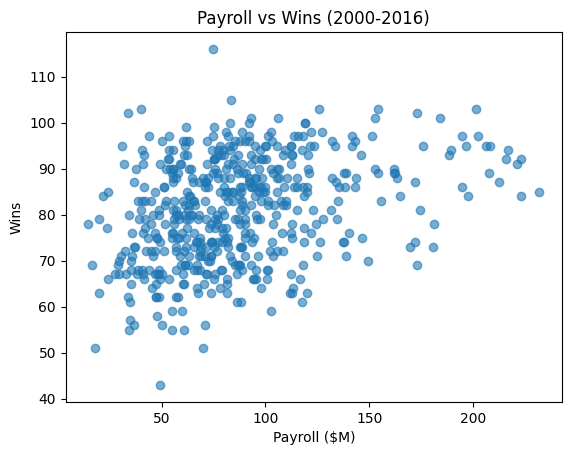

In [6]:
plt.figure()
plt.scatter(df["payroll"]/1e6, df["W"], alpha=0.6)
plt.xlabel("Payroll ($M)")
plt.ylabel("Wins")
plt.title("Payroll vs Wins (2000-2016)")
plt.show

In [7]:
df[["W", "payroll", "Total_WAR"]].corr()

,W,payroll,Total_WAR
W,1.000000,0.342266,0.921338
payroll,0.342266,1.000000,0.334778
Total_WAR,0.921338,0.334778,1.000000


WAR vs Wins

<function matplotlib.pyplot.show(close=None, block=None)>

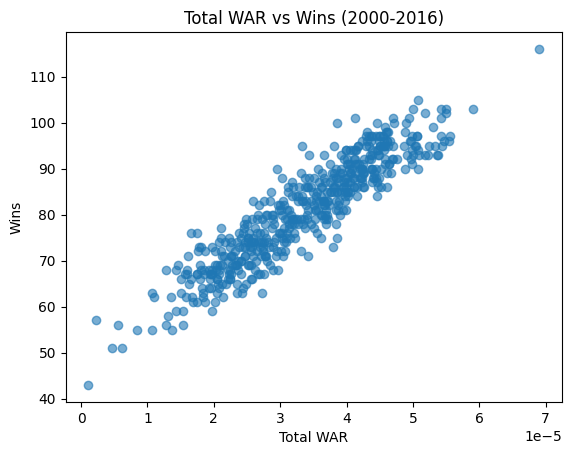

In [8]:
plt.figure()
plt.scatter(df["Total_WAR"]/1e6, df["W"], alpha=0.6)
plt.xlabel("Total WAR")
plt.ylabel("Wins")
plt.title("Total WAR vs Wins (2000-2016)")
plt.show

Payroll vs WAR

<function matplotlib.pyplot.show(close=None, block=None)>

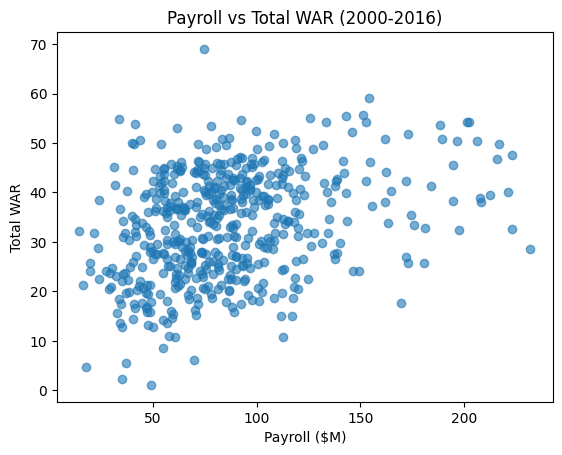

In [9]:
plt.figure()
plt.scatter(df["payroll"]/1e6, df["Total_WAR"], alpha=0.6)
plt.xlabel("Payroll ($M)")
plt.ylabel("Total WAR")
plt.title("Payroll vs Total WAR (2000-2016)")
plt.show

## Efficieny Metrics

In [10]:
df = df.copy()
df["Dollars_per_Win"] = df["payroll"] / df["W"]
df["Dollars_per_WAR"] = df["payroll"] / df["Total_WAR"]
df["WAR_per_Million"] = df["Total_WAR"] / (df["payroll"]/1000000)

## Dollars per WAR

<function matplotlib.pyplot.show(close=None, block=None)>

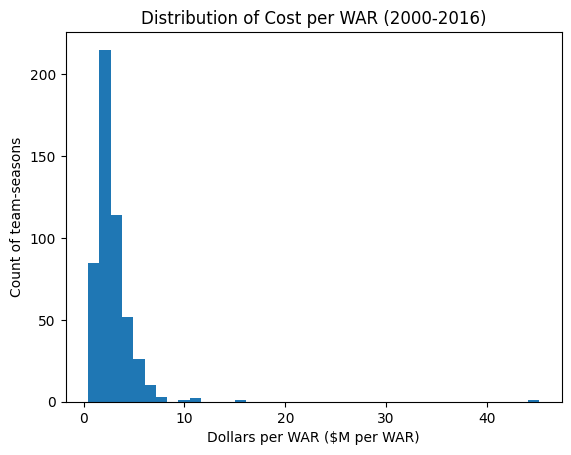

In [11]:
clean = df[df["Total_WAR"] > 0].copy()

plt.figure()
plt.hist(clean["Dollars_per_WAR"]/1e6, bins = 40)
plt.xlabel("Dollars per WAR ($M per WAR)")
plt.ylabel("Count of team-seasons")
plt.title("Distribution of Cost per WAR (2000-2016)")
plt.show

## Trend over time of cost per WAR

<function matplotlib.pyplot.show(close=None, block=None)>

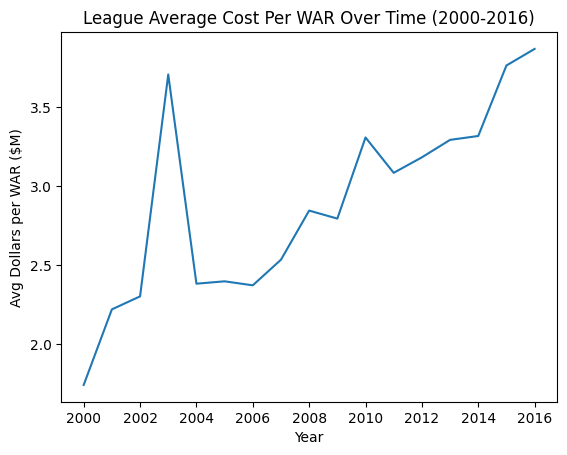

In [14]:
yearly = clean.groupby("yearID", as_index=False).agg(
    avg_dollars_per_war=("Dollars_per_WAR", "mean"),
    median_dollars_per_war=("Dollars_per_WAR", "median"),
    avg_payroll=("payroll", "mean"),
    avg_war=("Total_WAR", "mean"),
    avg_wins=("W", "mean")
)

plt.figure()
plt.plot(yearly["yearID"], yearly["avg_dollars_per_war"]/1e6)
plt.xlabel("Year")
plt.ylabel("Avg Dollars per WAR ($M)")
plt.title("League Average Cost Per WAR Over Time (2000-2016)")
plt.show